# Análisis Exploratorio FastF1
https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html

In [3]:
#FastF1
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps

#MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.cbook as cbook
import matplotlib.image as image
from matplotlib import style
import matplotlib.ticker as ticker

from timple.timedelta import strftimedelta

In [4]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

In [5]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [10]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')

Año: 2022
Round: 12
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R


In [11]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for French Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '6', '47', '24', '18', '10', '23', '5', '77', '31', '3', '22', '14', '63', '4', '44', '11', '1', '55', '20']


In [18]:
session.event

RoundNumber                                                  12
Country                                                  France
Location                                           Le Castellet
OfficialEventName    FORMULA 1 LENOVO GRAND PRIX DE FRANCE 2022
EventDate                                   2022-07-24 17:00:00
EventName                                     French Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2022-07-22 14:00:00
Session2                                             Practice 2
Session2Date                                2022-07-22 17:00:00
Session3                                             Practice 3
Session3Date                                2022-07-23 13:00:00
Session4                                             Qualifying
Session4Date                                2022-07-23 16:00:00
Session5                                

In [53]:
session.car_data

{'16':                          Date  RPM  Speed  nGear  Throttle  Brake  DRS Source  \
 0     2022-07-24 12:29:23.167    0      0      0         0  False    1    car   
 1     2022-07-24 12:29:23.327    0      0      0         0  False    1    car   
 2     2022-07-24 12:29:23.527    0      0      0         0  False    1    car   
 3     2022-07-24 12:29:23.687    0      0      0         0  False    1    car   
 4     2022-07-24 12:29:24.007    0      0      0         0  False    1    car   
 ...                       ...  ...    ...    ...       ...    ...  ...    ...   
 28239 2022-07-24 14:37:34.003    0      0      0       104   True    1    car   
 28240 2022-07-24 14:37:34.203    0      0      0       104   True    1    car   
 28241 2022-07-24 14:37:34.563    0      0      0       104   True    1    car   
 28242 2022-07-24 14:37:34.763    0      0      0       104   True    1    car   
 28243 2022-07-24 14:37:35.163    0      0      0       104   True    1    car   
 
        

In [20]:
session.date

Timestamp('2022-07-24 15:00:00')

In [21]:
session.drivers

['16',
 '6',
 '47',
 '24',
 '18',
 '10',
 '23',
 '5',
 '77',
 '31',
 '3',
 '22',
 '14',
 '63',
 '4',
 '44',
 '11',
 '1',
 '55',
 '20']

In [22]:
session.f1_api_support

True

In [28]:
session.get_driver('1')

DriverNumber                   1
BroadcastName       M VERSTAPPEN
Abbreviation                 VER
TeamName         Red Bull Racing
TeamColor                 1e5bc6
FirstName                    Max
LastName              Verstappen
FullName          Max Verstappen
Position                     0.0
GridPosition                 0.0
Q1                           NaT
Q2                           NaT
Q3                           NaT
Time                         NaT
Status                          
Points                       0.0
Name: Max, dtype: object

In [45]:
session.race_control_messages[0:20]

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber
0,2022-07-24 12:30:00,Other,PIT EXIT CLOSED,None,None,None,NaN,None
1,2022-07-24 12:36:21,Flag,YELLOW IN TRACK SECTOR 7,None,YELLOW,Sector,7.0,None
2,2022-07-24 12:36:22,Other,DRS DISABLED IN ZONE 1,None,None,None,NaN,None
3,2022-07-24 12:36:23,Other,DRS ENABLED IN ZONE 1,None,None,None,NaN,None
4,2022-07-24 12:36:23,Flag,CLEAR IN TRACK SECTOR 7,None,CLEAR,Sector,7.0,None
5,2022-07-24 12:36:25,Flag,DOUBLE YELLOW IN TRACK SECTOR 7,None,DOUBLE YELLOW,Sector,7.0,None
6,2022-07-24 12:36:26,Other,DRS DISABLED IN ZONE 1,None,None,None,NaN,None
7,2022-07-24 12:36:28,Other,DRS ENABLED IN ZONE 1,None,None,None,NaN,None
8,2022-07-24 12:36:28,Flag,CLEAR IN TRACK SECTOR 7,None,CLEAR,Sector,7.0,None
9,2022-07-24 12:36:30,Other,TRACK SURFACE SLIPPERY IN TRACK SECTOR 7,None,None,None,NaN,None


In [46]:
session.session_status

,Time,Status
0,0 days 00:08:28.271000,Inactive
1,0 days 00:42:40.279000,Started
2,0 days 02:12:42.644000,Finished
3,0 days 02:16:35.261000,Finalised
4,0 days 02:25:09.159000,Ends


In [47]:
session.weekend

RoundNumber                                                  12
Country                                                  France
Location                                           Le Castellet
OfficialEventName    FORMULA 1 LENOVO GRAND PRIX DE FRANCE 2022
EventDate                                   2022-07-24 17:00:00
EventName                                     French Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2022-07-22 14:00:00
Session2                                             Practice 2
Session2Date                                2022-07-22 17:00:00
Session3                                             Practice 3
Session3Date                                2022-07-23 13:00:00
Session4                                             Qualifying
Session4Date                                2022-07-23 16:00:00
Session5                                

In [54]:
session.laps.pick_driver('1').pick_fastest()

Time                      0 days 01:34:33.110000
DriverNumber                                   1
LapTime                   0 days 00:01:37.491000
LapNumber                                     30
Stint                                          2
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.667000
Sector2Time               0 days 00:00:29.686000
Sector3Time               0 days 00:00:43.138000
Sector1SessionTime        0 days 01:33:20.286000
Sector2SessionTime        0 days 01:33:49.972000
Sector3SessionTime        0 days 01:34:33.110000
SpeedI1                                    109.0
SpeedI2                                    279.0
SpeedFL                                    289.0
SpeedST                                    317.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                    14.0
FreshTyre           

In [55]:
#Listado de vueltas más rápidas
drivers = pd.unique(session.laps['Driver'])

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 02:09:58.722000,55,0 days 00:01:35.781000,51,3,NaT,NaT,0 days 00:00:24.221000,0 days 00:00:29.393000,0 days 00:00:42.167000,...,True,MEDIUM,9.0,True,0 days 02:08:22.941000,Ferrari,SAI,1,True,2022-07-24 14:29:23.232
1,0 days 01:34:33.110000,1,0 days 00:01:37.491000,30,2,NaT,NaT,0 days 00:00:24.667000,0 days 00:00:29.686000,0 days 00:00:43.138000,...,True,HARD,14.0,True,0 days 01:32:55.619000,Red Bull Racing,VER,1,True,2022-07-24 13:53:55.910
2,0 days 02:09:42.797000,63,0 days 00:01:37.548000,51,2,NaT,NaT,0 days 00:00:24.665000,0 days 00:00:30.017000,0 days 00:00:42.866000,...,True,HARD,34.0,False,0 days 02:08:05.249000,Mercedes,RUS,1,True,2022-07-24 14:29:05.540
3,0 days 01:34:37.145000,44,0 days 00:01:37.668000,30,2,NaT,NaT,0 days 00:00:24.469000,0 days 00:00:29.993000,0 days 00:00:43.206000,...,True,HARD,12.0,True,0 days 01:32:59.477000,Mercedes,HAM,1,True,2022-07-24 13:53:59.768
4,0 days 01:59:19.039000,11,0 days 00:01:37.780000,45,2,NaT,NaT,0 days 00:00:24.809000,0 days 00:00:29.760000,0 days 00:00:43.211000,...,True,HARD,27.0,True,0 days 01:57:41.259000,Red Bull Racing,PER,1,True,2022-07-24 14:18:41.550
5,0 days 02:12:20.944000,77,0 days 00:01:37.963000,52,3,NaT,NaT,0 days 00:00:24.809000,0 days 00:00:29.962000,0 days 00:00:43.192000,...,True,MEDIUM,16.0,True,0 days 02:10:42.981000,Alfa Romeo,BOT,1,True,2022-07-24 14:31:43.272
6,0 days 00:49:18.853000,16,0 days 00:01:38.088000,4,1,NaT,NaT,0 days 00:00:24.921000,0 days 00:00:29.872000,0 days 00:00:43.295000,...,True,MEDIUM,4.0,True,0 days 00:47:40.765000,Ferrari,LEC,1,True,2022-07-24 13:08:41.056
7,0 days 02:13:25.564000,14,0 days 00:01:38.160000,53,2,NaT,NaT,0 days 00:00:24.804000,0 days 00:00:30.047000,0 days 00:00:43.309000,...,True,HARD,35.0,True,0 days 02:11:47.404000,Alpine,ALO,1,True,2022-07-24 14:32:47.695
8,0 days 02:13:39.603000,31,0 days 00:01:38.684000,53,2,NaT,NaT,0 days 00:00:25.045000,0 days 00:00:30.127000,0 days 00:00:43.512000,...,True,HARD,35.0,True,0 days 02:12:00.919000,Alpine,OCO,1,True,2022-07-24 14:33:01.210
9,0 days 02:13:48.074000,10,0 days 00:01:38.786000,53,2,NaT,NaT,0 days 00:00:25.045000,0 days 00:00:30.138000,0 days 00:00:43.603000,...,True,MEDIUM,35.0,True,0 days 02:12:09.288000,AlphaTauri,GAS,1,True,2022-07-24 14:33:09.579


In [57]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [58]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     SAI 0 days 00:01:35.781000        0 days 00:00:00
1     VER 0 days 00:01:37.491000 0 days 00:00:01.710000
2     RUS 0 days 00:01:37.548000 0 days 00:00:01.767000
3     HAM 0 days 00:01:37.668000 0 days 00:00:01.887000
4     PER 0 days 00:01:37.780000 0 days 00:00:01.999000
5     BOT 0 days 00:01:37.963000 0 days 00:00:02.182000
6     LEC 0 days 00:01:38.088000 0 days 00:00:02.307000
7     ALO 0 days 00:01:38.160000 0 days 00:00:02.379000
8     OCO 0 days 00:01:38.684000 0 days 00:00:02.903000
9     GAS 0 days 00:01:38.786000 0 days 00:00:03.005000
10    NOR 0 days 00:01:39.037000 0 days 00:00:03.256000
11    VET 0 days 00:01:39.044000 0 days 00:00:03.263000
12    MSC 0 days 00:01:39.068000 0 days 00:00:03.287000
13    RIC 0 days 00:01:39.133000 0 days 00:00:03.352000
14    STR 0 days 00:01:39.185000 0 days 00:00:03.404000
15    ALB 0 days 00:01:39.199000 0 days 00:00:03.418000
16    MAG 0 days 00:01:39.265000 0 days 00:00:03

In [65]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = fastest_laps.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
6,LapNumber,TyreLife,0.781712,0.781712
42,TyreLife,LapNumber,0.781712,0.781712
39,SpeedST,SpeedFL,0.695239,0.695239
33,SpeedFL,SpeedST,0.695239,0.695239
45,TyreLife,SpeedI2,0.619337,0.619337
27,SpeedI2,TyreLife,0.619337,0.619337
3,LapNumber,SpeedI2,0.610997,0.610997
21,SpeedI2,LapNumber,0.610997,0.610997
20,SpeedI1,TyreLife,-0.592239,0.592239
44,TyreLife,SpeedI1,-0.592239,0.592239


In [64]:
corr_matrix = fastest_laps.select_dtypes(include=['float64', 'int']).corr(method='pearson')

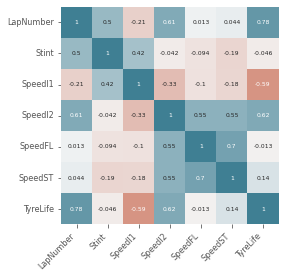

In [66]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [67]:
# Variables cualitativas (tipo object)
# ==============================================================================
fastest_laps.select_dtypes(include=['object']).describe()

,DriverNumber,Compound,Team,Driver,TrackStatus
count,20,20,20,20,20
unique,20,2,10,20,2
top,55,HARD,Ferrari,SAI,1
freq,1,14,2,1,19


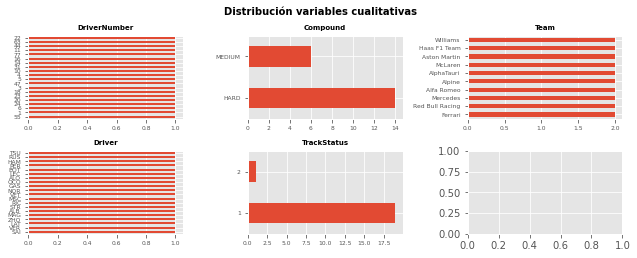

In [70]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = fastest_laps.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    fastest_laps[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [6, 7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

In [71]:
# Variables numéricas
# ==============================================================================
fastest_laps.select_dtypes(include=['float64', 'int']).describe()

,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife
count,20.000000,20.000000,16.000000,20.000000,20.000000,20.000000,20.000000
mean,38.400000,2.150000,106.625000,276.100000,287.500000,307.150000,19.600000
std,16.684061,0.587143,2.941088,2.789076,3.332456,7.962246,13.156547
min,4.000000,1.000000,103.000000,271.000000,283.000000,295.000000,2.000000
25%,29.250000,2.000000,104.000000,275.000000,285.750000,302.000000,7.750000
50%,44.000000,2.000000,106.000000,276.000000,287.000000,304.000000,20.500000
75%,52.000000,2.250000,109.000000,278.250000,289.000000,311.000000,34.250000
max,53.000000,3.000000,114.000000,280.000000,299.000000,325.000000,35.000000


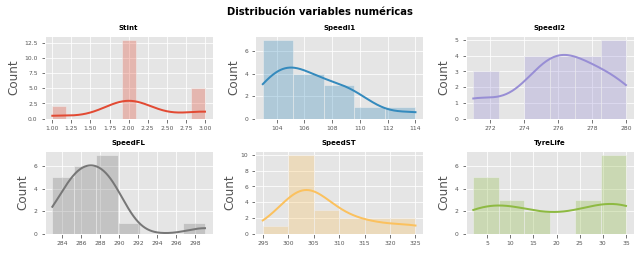

In [77]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = fastest_laps.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('LapNumber')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = fastest_laps,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [6, 7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

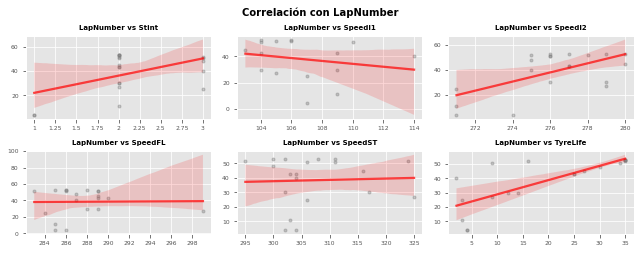

In [79]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = fastest_laps.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('LapNumber')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = fastest_laps[colum],
        y           = fastest_laps['LapNumber'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"LapNumber vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [6,7,8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con LapNumber', fontsize = 10, fontweight = "bold");